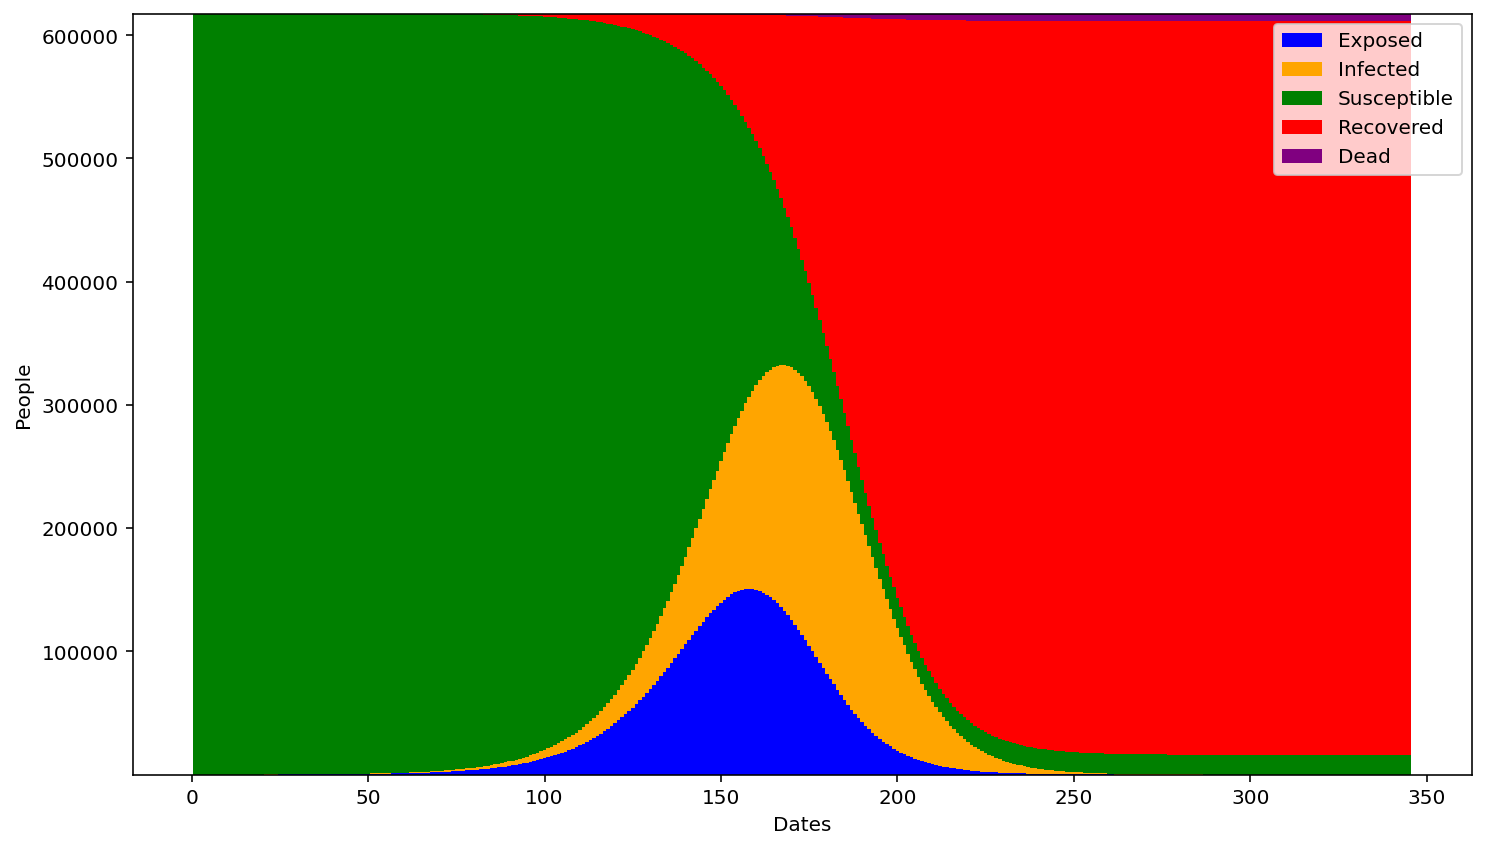

In [3]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np


# address csv file data into dataframe
raw_data = []
with open('Normal.csv') as File:
    reader = csv.DictReader(File)
    for row in reader:
        raw_data.append(row)

# head = raw_data[:37]

# print(head)
raw_data = raw_data[38:]

# dictionary inedx 0: 'class edu.neu.info6205.model.Virus'
# dictionary inedx 1: None
lst = list(raw_data[0].values())

res =[]
# print(lst[1])
for n in range(len(raw_data)):
    lst = list(raw_data[n].values())
    lst[1].insert(0, n+1)
    res.append(lst[1])

df = pd.DataFrame(res, columns = ['Days', 'Susceptible', 'Exposed', 'Infected', 'Recovered', 'Dead', 'R', 'K'])

# x axis - days
x =[]
strx = df["Days"].tolist()
for i in strx:
    x.append(int(i))

# y axis - people

# y_Sus stand for people of Susceptible
y_Sus =[]
strSus = df["Susceptible"].tolist()
for i in strSus:
    y_Sus.append(int(i))

# y_Ex stand for people of Exposed
y_Ex = []
strEx = df["Exposed"].tolist()
for i in strEx:
    y_Ex.append(int(i))

# y_Inf stand for people of Exposed
y_Inf = []
strInf = df["Infected"].tolist()
for i in strInf:
    y_Inf.append(int(i))

# y_Rec stand for people of Exposed
y_Rec = []
strRec = df["Recovered"].tolist()
for i in strRec:
    y_Rec.append(int(i))

# y_Dead stand for people of Exposed
y_Dead = []
strDead = df["Dead"].tolist()
for i in strDead:
    y_Dead.append(int(i))



# new df
new_df = pd.DataFrame({'Days': x,'Exposed': y_Ex,  'Infected': y_Inf, 'Susceptible': y_Sus,  'Recovered': y_Rec, 'Dead': y_Dead})



# recursive function for animation
def buildmebarchart(i=int):
    plt.legend(new_df.columns[1:])
    ax1.bar(x[i], y_Ex[i], 1, label='Exposed',color = 'blue')
    ax1.bar(x[i], y_Inf[i], 1, bottom = y_Ex[i], label='Infected', color = 'orange')
    ax1.bar(x[i], y_Sus[i], 1, bottom = np.array(y_Inf)[i] + np.array(y_Ex)[i],
           label='Susceptible',color = 'green')
    ax1.bar(x[i], y_Rec[i], 1, bottom = np.array(y_Sus)[i]+np.array(y_Inf)[i]+ np.array(y_Ex)[i],
           label='Recovery',color = 'red')
    ax1.bar(x[i], y_Dead[i], 1, bottom = np.array(y_Rec)[i]+np.array(y_Sus)[i]+ np.array(y_Inf)[i] + np.array(y_Ex)[i],
           label='Dead',color = 'purple')

# 
fig,ax1 = plt.subplots()
plt.ylabel('People')
plt.xlabel('Dates')
import matplotlib.animation as ani
from IPython import display

animator = ani.FuncAnimation(fig, buildmebarchart, interval = 50, frames = x[-1])
writergif = ani.FFMpegWriter(fps=30)
animator.save('Normal_Animation.mp4', writer=writergif)




